# Results

In [80]:
from os import makedirs
from os.path import join

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.ticker import MaxNLocator

plt.rcParams.update({
    'text.latex.preamble': r'\usepackage{cmbright}',
    'text.usetex': True,
    'font.family': 'serif',
})
color_palette = sns.color_palette('deep')
plt.rc('grid', linestyle="dotted", color='lightgrey')

results_dir = '../rpaper'
plots_dir = 'paper_plots'

arch_name = {
    'convnext-atto': 'ConvnextAtto',
    'convnext-tiny': 'ConvNextTiny',
    'convnextv2-atto': 'Convnextv2Atto',
    'convnextv2-nano': 'Convnextv2Nano',
    'convnextv2-tiny': 'Convnextv2Tiny',
    'densenet121': 'DenseNet121',
    'densenet161': 'DenseNet161',
    'mobilenetv3-small-075': 'MobileNetV3-Small-0.75',
    'mobilenetv3-large-100': 'MobileNetV3-Large-1.0',
    'mobilevitv2-050': 'MobileViTv2-0.5',
    'mobilevitv2-100': 'MobileViTv2-1.0',
    'mobilevitv2-200': 'MobileViTv2-2.0',

}

makedirs(plots_dir, exist_ok=True)

### Arch

In [59]:
def load_arch_df():
    df = pd.read_csv(join(results_dir, 'arch_batch-size-48', 'exp_mtst.csv'))
    df['Arch'] = df['run']
    df['Unseen'] = df['unseen']
    df['Seen'] = df['seen']
    df['HM'] = df['hm']
    df = df[['Arch', 'Unseen', 'Seen', 'HM']]
    df = df.set_index('Arch')

    df_params_macs = pd.DataFrame(
        [
            # Efficient
            ('mobilenetv3-small-075',  1.02,  0.12, 'conv'),
            ('mobilevitv2-050',        1.11,  1.05, 'tsfm'),
            ('mobilenetv3-large-100',  4.20,  0.63, 'conv'),
            ('mobilevitv2-100',        4.39,  4.08, 'tsfm'),
            ('convnext-atto',          3.37,  1.62, 'conv'),
            # Large
            ('densenet121',           6.95,   8.33, 'conv'),
            ('densenet161',           26.47, 22.70, 'conv'),
            ('convnext-tiny',         27.82, 28.60, 'conv'),
            ('mobilevitv2-200',       17.42, 16.11, 'tsfm'),
        ],
        columns=['Arch', 'Params', 'MACs', 'CP']
    ).set_index('Arch')


    df = pd.concat([df_params_macs, df], axis=1, join="inner")
    df = df.reset_index()
    df = df.replace(arch_name)
    df = df[['Arch', 'Unseen', 'Seen', 'HM', 'Params', 'MACs', 'CP']]
    return df


arch_df = load_arch_df()
arch_df

,Arch,Unseen,Seen,HM,Params,MACs,CP
0,MobileNetV3-Small-0.75,72.74±0.47,83.39±0.16,74.90±0.36,1.02,0.12,conv
1,MobileViTv2-0.5,75.35±0.45,83.35±0.16,76.63±0.35,1.11,1.05,tsfm
2,MobileNetV3-Large-1.0,74.70±0.47,84.42±0.15,76.57±0.36,4.20,0.63,conv
3,MobileViTv2-1.0,76.88±0.44,83.14±0.16,77.61±0.33,4.39,4.08,tsfm
4,ConvnextAtto,73.00±0.44,83.54±0.15,75.44±0.34,3.37,1.62,conv
5,DenseNet121,76.96±0.40,81.50±0.17,77.20±0.30,6.95,8.33,conv
6,DenseNet161,77.83±0.42,83.36±0.16,78.41±0.31,26.47,22.70,conv
7,ConvNextTiny,76.11±0.44,85.26±0.14,78.07±0.34,27.82,28.60,conv
8,MobileViTv2-2.0,77.58±0.43,82.98±0.16,77.96±0.33,17.42,16.11,tsfm


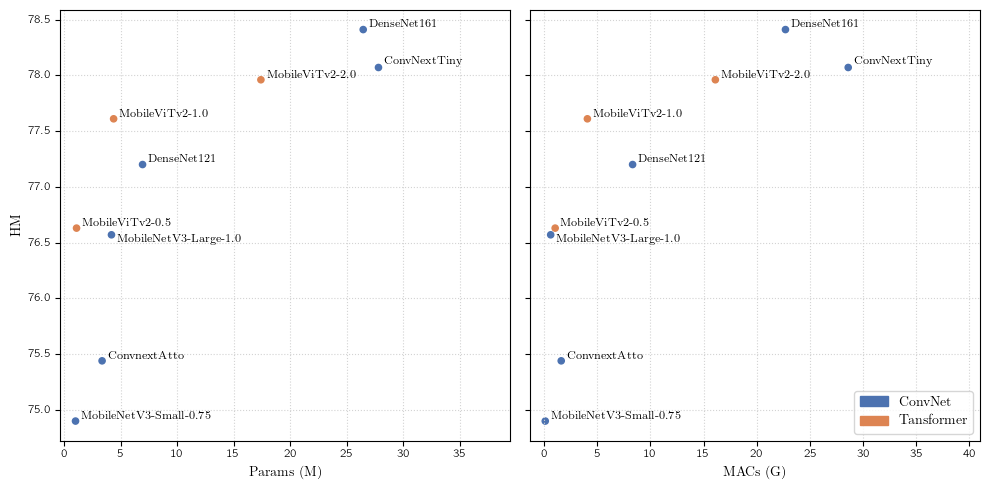

In [ ]:
def generate_arch_plot(df: pd.DataFrame):
    import matplotlib.patches as mpatches
    from matplotlib.axes import Axes

    df = df.copy()
    df['Unseen'] = df['Unseen'].str[:5].astype(float)
    df['Seen'] = df['Seen'].str[:5].astype(float)
    df['HM'] = df['HM'].str[:5].astype(float)

    fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 5))
    ax0: Axes = ax0
    ax1: Axes = ax1

    cp_color = {'conv': color_palette[0], 'tsfm': color_palette[1]}
    colors = [cp_color[cp] for cp in df['CP']]
    # _color = color[:len(df)]

    df.plot.scatter('Params', 'HM', ax=ax0, c=colors)
    df.plot.scatter('MACs', 'HM', ax=ax1, c=colors)

    for x, y, arch in zip(df['Params'], df['HM'], df['Arch']):
        if arch == 'MobileNetV3-Large-1.0':
            ax0.text(x+0.5, y, f'{arch}', ha='left', va='top', fontsize='small')
        else:
            ax0.text(x+0.5, y, f'{arch}', ha='left', va='bottom', fontsize='small')
    xmin, xmax = ax0.get_xlim()
    ax0.set_xlim(xmin, xmax + 0.35 * (xmax - xmin))
    ax0.tick_params(axis='both', which='major', labelsize='small', )

    for x, y, arch in zip(df['MACs'], df['HM'], df['Arch']):
        if arch == 'MobileNetV3-Large-1.0':
            ax1.text(x+0.5, y, f'{arch}', ha='left', va='top', fontsize='small')
        else:
            ax1.text(x+0.5, y, f'{arch}', ha='left', va='bottom', fontsize='small')
    xmin, xmax = ax1.get_xlim()
    ax1.set_xlim(xmin, xmax + 0.35 * (xmax - xmin))
    ax1.tick_params(axis='both', which='major', labelsize='small')

    ax0.set_ylabel('HM')
    ax0.set_xlabel('Params (M)')
    ax1.set_xlabel('MACs (G)')
    ax1.set_yticklabels([])
    ax1.yaxis.label.set_visible(False)

    conv_patch = mpatches.Patch(color=cp_color['conv'], label='ConvNet')
    tsfm_patch = mpatches.Patch(color=cp_color['tsfm'], label='Transformer')
    ax1.legend(handles=[conv_patch, tsfm_patch], loc='lower right')

    # plt.xticks(fontsize='small')
    # plt.yticks(fontsize='small')

    ax0.grid()
    ax1.grid()

    plt.tight_layout()
    plt.savefig(join(plots_dir, "params-macs.pdf"))
    plt.show()

generate_arch_plot(arch_df)

### Resolution

In [77]:
def load_resolution_df():
    df = pd.read_csv(join(results_dir, 'resolution', 'exp_mtst.csv'))
    df[['arch', 'resolution']] = df['run'].str.split('_', expand=True)
    df['Arch'] = df['arch'].astype(str)
    df['Resolution'] = df['resolution'].astype(int)
    df['Unseen'] = df['unseen']
    df['Seen'] = df['seen']
    df['HM'] = df['hm']
    df = df[['Arch', 'Resolution', 'Unseen', 'Seen', 'HM']]
    df = df.replace(arch_name)
    return df

resolution_df = load_resolution_df()
resolution_df

,Arch,Resolution,Unseen,Seen,HM
0,ConvNextTiny,224,74.76±0.44,84.58±0.15,76.95±0.34
1,ConvNextTiny,384,76.45±0.43,84.53±0.15,78.05±0.33
2,ConvNextTiny,512,76.58±0.43,84.75±0.15,78.17±0.33
3,ConvNextTiny,768,76.89±0.43,84.85±0.15,78.45±0.32
4,DenseNet121,224,76.84±0.42,83.03±0.16,77.62±0.32
5,DenseNet121,384,77.99±0.43,82.36±0.17,77.91±0.33
6,DenseNet121,512,77.60±0.41,82.33±0.17,77.92±0.30
7,MobileNetV3-Large-1.0,224,71.20±0.44,80.82±0.17,73.36±0.31
8,MobileNetV3-Large-1.0,384,75.25±0.46,84.42±0.15,76.95±0.35
9,MobileNetV3-Large-1.0,512,75.63±0.45,84.65±0.15,77.34±0.35


Figure(640x480)


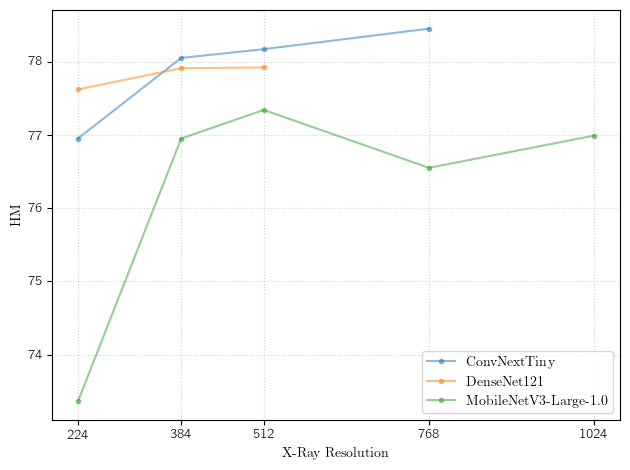

<Figure size 640x480 with 0 Axes>

In [78]:
def generate_resolution_plot(df: pd.DataFrame):
    df = df.copy()
    df['Unseen'] = df['Unseen'].str[:5].astype(float)
    df['Seen'] = df['Seen'].str[:5].astype(float)
    df['HM'] = df['HM'].str[:5].astype(float)

    fig, ax = plt.subplots()
    print(plt.figure())

    archs = df['Arch'].unique()
    for arch in archs:
        arch_df = df[df['Arch'] == arch]
        arch_df.plot(
            x='Resolution', y='HM',
            ax=ax,
            marker='.', linestyle='solid',
            alpha=0.5
        )

    ax.legend(archs)
    ax.set_xticks(df['Resolution'].unique())
    ax.set_xlabel('X-Ray Resolution')
    ax.set_ylabel('HM')

    ax.grid()
    fig.tight_layout()
    fig.savefig(join(plots_dir, 'resolution.pdf'))


generate_resolution_plot(resolution_df)

### From Generalized FSL to Standard FSL

In [ ]:
results_dir = '../../Meta-CXR-dev-run/rpaper'

def load_gfsl_df(

    ):
    df = pd.read_csv(join(results_dir, 'gfsl', 'exp_mtst.csv'))

    df[['n-way', 'n-unseen', 'k-shot']] = df['run'].str.split('_', expand=True)
    df['n-way'] = df['n-way'].str[5:].astype(int)
    df['n-unseen'] = df['n-unseen'].str[7:].astype(int)
    df['k-shot'] = df['k-shot'].str[6:].astype(int)
    # df['Unseen'] = df['unseen'].str[:5].astype(float)
    # df['Seen'] = df['seen'].str[:5].astype(float)
    # df['HM'] = df['hm'].str[:5].astype(float)
    df['Unseen'] = df['unseen']
    df['Seen'] = df['seen']
    df['HM'] = df['hm']

    df = df[['n-way', 'n-unseen', 'k-shot', 'Unseen', 'Seen', 'HM']]
    return df

gfsl_df = load_gfsl_df()
with open('gfsl.md', 'w') as f:
    f.write(gfsl_df.to_markdown(index=False) + '\n')
gfsl_df

In [ ]:
def generate_gfsl_df(df, k_shot):
    sns.set_palette('deep')
    fig, ax = plt.subplots(figsize=(6, 5))

    for n_way, c in zip((3, 4, 5), color):
        n_way_label = f'{n_way}-way'
        subdf = df[df['n-way'] == n_way]
        # subdf = subdf.rename(columns={'HM': n_way_label})
        # subdf.plot(x='n-unseen', y=n_way_label,
        #            style='o-', ax=ax, color=c)
        # subdf.plot(x='n-unseen', y='Unseen',
        #            style='s-', ax=ax, color=c, alpha=0.5)
        # subdf.plot(x='n-unseen', y='Seen',
        #            style='D-', ax=ax, color=c, alpha=0.5)

        subdf.plot(x='n-unseen', y='HM',
                   ax=ax,
                   marker='.', linestyle='solid',
                   color=c)
        subdf.plot(x='n-unseen', y='Unseen',
                   ax=ax,
                   marker='.', linestyle='dotted',
                   color=c, alpha=0.5)
        subdf.plot(x='n-unseen', y='Seen',
                   ax=ax,
                   marker='.', linestyle='dashed',
                   color=c, alpha=0.5)

        ax.get_legend().remove()

        from matplotlib.legend import Legend
        leg = Legend(ax, ax.get_lines()[-3:],
                     ['HM', 'Unseen', 'Seen'],
                     title=f'{n_way}-way',
                     fontsize='x-small',
                     edgecolor=c,
                     loc='upper right')
        bb = leg.get_bbox_to_anchor().transformed(ax.transAxes.inverted())
        y_offset = (3 - n_way) * 0.18
        bb.y0 += y_offset
        bb.y1 += y_offset
        leg.set_bbox_to_anchor(bb, transform = ax.transAxes)
        ax.add_artist(leg)

    ax.set_xticks(range(1, 6))
    ax.tick_params(axis='both', which='major', labelsize='small')
    ax.set_xlabel(r'$n$-unseen: Number of Unseen Pathologies')
    ax.set_ylabel('AUC')

    plt.title(f'From Generalized to Standard FSL (At least {k_shot}-shot)')

    plt.tight_layout()
    plt.savefig(join(plots_dir, "gfsl.pdf"))
    plt.show()


for k_shot, k_shot_df in gfsl_df.groupby('k-shot'):
    k_shot_df = k_shot_df.drop(columns=['k-shot'])
    generate_gfsl_df(k_shot_df, k_shot)
    print(k_shot_df)



# for k_shot in gfsl_df['k-shot'].unique():
#     print(k_shot)
    #generate_gfsl_df(gfsl_df)